In [4]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz (15.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.0.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached thinc-8.0.17-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
Using cached spacy-3.0.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.9 MB)
Using cached thinc-8.0.17-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (659 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fol

In [5]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [6]:
!conda create --name myenv python=3.8

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/myenv

  added / updated specs:
    - python=3.8


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h4bc722e_7 
  ca-certificates    conda-forge/linux-64::ca-certificates-2024.8.30-hbcca054_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.43-h712a8e2_1 
  libffi             conda-forge/linux-64::libffi-3.4.2-h7f98852_5 
  libgcc             conda-forge/linux-64::libgcc-14.1.0-h77fa898_1 
  libgcc-ng          conda-forge/linux-64::libgcc-ng-14.1.0-h69a702a

# **# Code base **is being changed due to access issues. save the file as a different name in your colab session- This should fix it

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import gzip
import shutil

input_gz_file = '/content/NOTEEVENTS.csv.gz'
output_csv_file = '/content/NOTEEVENTS.csv'

with gzip.open(input_gz_file, 'rb') as f_in:
    with open(output_csv_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [9]:
dataset_path1 = '/content/NOTEEVENTS.csv'
dataset_path2 = '/content/DIAGNOSES_ICD.csv'

In [10]:
import pandas as pd
df1 = pd.read_csv(dataset_path1)
df2 = pd.read_csv(dataset_path2)

<ipython-input-10-825938cfbc97>:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(dataset_path1)


In [11]:
df1.shape

(2083180, 11)

**bold text\**# **Filter the data in files to create a new relevant dataframe**

> Add blockquote



In [12]:
filtered_chartevents_df = df1[df1['TEXT'].str.contains('cough', case=False)]
len(filtered_chartevents_df)

209632

In [13]:
filtered_chartevents_df.columns = map(str.lower, filtered_chartevents_df.columns)

In [14]:
print('hadm_id' in df2.columns)
print('hadm_id' in filtered_chartevents_df.columns)

True
True


In [15]:
filtered_chartevents_df.head()

row_id  subject_id   hadm_id   chartdate charttime storetime  \
2      176       13702  167118.0  2119-05-25       NaN       NaN   
3      177       13702  196489.0  2124-08-18       NaN       NaN   
6      180       20646  134727.0  2112-12-10       NaN       NaN   
15     226       11369  103786.0  2203-11-12       NaN       NaN   
17     228       79900  120644.0  2194-07-25       NaN       NaN   

             category description  cgid  iserror  \
2   Discharge summary      Report   NaN      NaN   
3   Discharge summary      Report   NaN      NaN   
6   Discharge summary      Report   NaN      NaN   
15  Discharge summary      Report   NaN      NaN   
17  Discharge summary      Report   NaN      NaN   

                                                 text  
2   Admission Date:  [**2119-5-4**]              D...  
3   Admission Date:  [**2124-7-21**]              ...  
6   Admission Date:  [**2112-12-8**]              ...  
15  Admission Date:  [**2203-11-3**]              ...  
17  Admission Date:  [**2194-7-18**]              ...

In [16]:
merged_df = pd.merge(df2, filtered_chartevents_df[['hadm_id', 'category', 'description','text']], on='hadm_id', how='inner')

merged_df = merged_df[merged_df['category'] == 'Nursing/other']

merged_df.head(10)


row_id  subject_id  hadm_id  seq_num icd9_code       category description  \
1   112344       10006   142345        1     99591  Nursing/other      Report   
3   112345       10006   142345        2     99662  Nursing/other      Report   
5   112346       10006   142345        3      5672  Nursing/other      Report   
7   112347       10006   142345        4     40391  Nursing/other      Report   
9   112348       10006   142345        5     42731  Nursing/other      Report   
11  112349       10006   142345        6      4280  Nursing/other      Report   
13  112350       10006   142345        7      4241  Nursing/other      Report   
15  112351       10006   142345        8      4240  Nursing/other      Report   
17  112352       10006   142345        9      2874  Nursing/other      Report   
19  112353       10006   142345       10     03819  Nursing/other      Report   

                                                 text  
1   FULL CODE     Universal Precautions     Allerg...  
3   FULL CODE     Universal Precautions     Allerg...  
5   FULL CODE     Universal Precautions     Allerg...  
7   FULL CODE     Universal Precautions     Allerg...  
9   FULL CODE     Universal Precautions     Allerg...  
11  FULL CODE     Universal Precautions     Allerg...  
13  FULL CODE     Universal Precautions     Allerg...  
15  FULL CODE     Universal Precautions     Allerg...  
17  FULL CODE     Universal Precautions     Allerg...  
19  FULL CODE     Universal Precautions     Allerg...

In [17]:
# Select required columns, filter based on ICD9_CODE, and reset index for new_df
new_df = merged_df[['hadm_id', 'icd9_code', 'text']].reset_index(drop=True)

demo42731_df = new_df[new_df['icd9_code'] == '4280'].reset_index(drop=True)

In [18]:
len(demo42731_df)

98

In [19]:
print(demo42731_df)

    hadm_id icd9_code                                               text
0    142345      4280  FULL CODE     Universal Precautions     Allerg...
1    199395      4280  nursing progress note 12n-7p\nneuro: lethargic...
2    199395      4280  neuro: pt is spanish speaking, difficult to as...
3    199395      4280  ROS:\n\nNeuro: Spanish speaking, does not unde...
4    199395      4280  SEE CAREVUE FOR Q1H VS, I&O, Q 4H CV ASSESSMEN...
..      ...       ...                                                ...
93   182664      4280  MICU Nursing Admission Note\n\nCode: Full\nAll...
94   182664      4280  Nursing progress notes 1900-0700\nCode: Full\n...
95   160445      4280  S. Denies pain\nO. Neuro [**Last Name (LF) **]...
96   160445      4280  Nursing Note--A shift\nPlease see Carevue for ...
97   160445      4280  Nursing Note--A Shift\nPlease see Carevue for ...

[98 rows x 3 columns]


In [20]:
!sudo apt-get install python3.8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python3.8 is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'python3.8' has no installation candidate


In [21]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1


update-alternatives: error: alternative path /usr/bin/python3.8 doesn't exist


# **Download the created datafram (whole or a part of it)**

In [22]:
import spacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz
!pip install https://huggingface.co/kormilitzin/en_core_med7_trf/resolve/main/en_core_med7_trf-any-py3-none-any.whl --user
!pip install https://huggingface.co/kormilitzin/en_core_med7_lg/resolve/main/en_core_med7_lg-any-py3-none-any.whl --user

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz (120.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
  Using cached thinc-8.1.12-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
Using cached spacy-3.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
Using cached thinc-8.1.12-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (919 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
    Found existing installation: spacy 3.0.9
    Uninstalling spacy-3.0.9:
      Successfully uninstalled spacy-3.0.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the 

ERROR: Invalid requirement: 'en-core-med7-trf==any': Expected end or semicolon (after name and no valid version specifier)
    en-core-med7-trf==any
                    ^
ERROR: Invalid requirement: 'en-core-med7-lg==any': Expected end or semicolon (after name and no valid version specifier)
    en-core-med7-lg==any
                   ^


In [23]:
import spacy.cli
import en_ner_bc5cdr_md
from spacy import displacy

In [24]:
# Load SpaCy model
nlp = spacy.load("en_ner_bc5cdr_md")

# Extract text from the first 10 rows of the 'TEXT' column
sample_texts = demo42731_df.loc[:9, 'text'].tolist()

# Process each text with the NER model

for text in sample_texts:
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)
    print(displacy.render(doc, style="ent", jupyter=True))


None


None


None


None


None


None


None


None


None


None


In [25]:
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp(sample_texts[i]))
  print(doc[-1])
  print('*************************************************************************************************************')

FULL CODE     Universal Precautions     Allergy: Heparin


See previous day's note for full H/P.

Neuro:  Very pleasant, cooperative.  Turns self, able to get OOB to commode w/ minimal assistance.  AAOx3, altho she does become confused when she's not feeling well per her daughter.  Pt said she didn't remember anything after having her dialysis treatment today when she was having shaking chills when her treatment was done.

CV:  HR=90s, NSR, no ectopy.  BP=90-110s/50s.  +periph pulses, extrems warm, no edema

Resp:  98% 02sat on r/a.  Lungs clear bilat - no cough.

GI/GU:  abd soft, +BS.  One BM - soft-formed, heme neg.  Daughter reports that she had been having diarrhea freq over the past month, and that it had finally subsided 3 days ago.  Foley cath d/c'd upon arrival to MICU as pt is on dialysis, but she does urinate some.

Pain:  no complaints of discomfort.

Skin:  Intact

ID:  T=99.6 oral.  Given Vanco, Ceftiaxone and Flagyl in ER and is now on Unasyn.

Access:  PIV #18.  Unable 

In [26]:
#named entitiesf
from spacy import displacy
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp(sample_texts[i]))
  for ent in doc[-1].ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print('*************************************************************************************************************')

Allergy 40 47 DISEASE
Heparin 49 56 CHEMICAL
Pt 283 285 CHEMICAL
chills 390 396 DISEASE
NSR 440 443 DISEASE
edema 507 512 DISEASE
cough 563 568 DISEASE
diarrhea 670 678 DISEASE
Pain 839 843 DISEASE
Vanco 916 921 CHEMICAL
Flagyl 938 944 CHEMICAL
Unasyn 965 971 CHEMICAL
sepsis 1009 1015 DISEASE
subcl 1031 1036 DISEASE
*************************************************************************************************************
pain 194 198 DISEASE
w/ 391 393 CHEMICAL
amiodarone 407 417 CHEMICAL
edema 483 488 DISEASE
cough 583 588 DISEASE
cough 641 646 DISEASE
NIDDM 724 729 DISEASE
QID 739 742 CHEMICAL
w/ 756 758 CHEMICAL
BOS 809 812 DISEASE
w/ 865 867 CHEMICAL
w/ 927 929 CHEMICAL
creatinine 945 955 CHEMICAL
lasix 993 998 CHEMICAL
*************************************************************************************************************
unsteady 230 238 DISEASE
pain 295 299 DISEASE
sinus beats 514 525 DISEASE
calcium 767 774 CHEMICAL
cough 1047 1052 DISEASE
lasix 1330 1335 CHEMICAL
*****

In [27]:
from spacy import displacy
for i in range(len(sample_texts)):
  displacy.render(doc, style="ent", jupyter=True)
  print('*************************************************************************************************************')

*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


In [28]:
# import scispacy
import spacy

nlp = spacy.load("en_ner_bc5cdr_md")
text = """
Heart failure is what the 4280 code represents. It is a very significant condiiton that often arises from a damaged and strained heart, which can be a result of diabetes, obesity, or coronary artery disease.
"""
doc = nlp(text)

print(list(doc.sents))

[
Heart failure is what the 4280 code represents., It is a very significant condiiton that often arises from a damaged and strained heart, which can be a result of diabetes, obesity, or coronary artery disease., 
]


In [29]:

# Examine the entities extracted by the mention detector.
# Note that they don't have types like in SpaCy, and they
# are more general (e.g including verbs) - these are any
# spans which might be an entity in UMLS, a large
# biomedical database.
print(doc.ents)


(Heart failure, diabetes, obesity, coronary artery disease)


In [30]:
# We can also visualise dependency parses
# (This renders automatically inside a jupyter notebook!):
from spacy import displacy
displacy.render(next(doc.sents), style='dep', jupyter=True)


In [31]:
!pip install scispacy
!pip install -U Spacy
!pip install scispacy

  Using cached spacy-3.7.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached thinc-8.2.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached spacy-3.7.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
Using cached thinc-8.2.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (922 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
     

In [32]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_craft_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_jnlpba_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz (125.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.0.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached thinc-8.0.17-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
Using cached spacy-3.0.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.9 MB)
Using cached thinc-8.0.17-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (659 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follo

In [33]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz (15.6 MB)
  Preparing metadata (setup.py) ... done


In [34]:
import scispacy
import spacy
import en_core_sci_sm
import en_ner_bc5cdr_md
import en_core_sci_lg
nlp = en_core_sci_sm.load()




/usr/local/lib/python3.10/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_sci_sm' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  yield d
/usr/local/lib/python3.10/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_sci_lg' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  yield d


In [35]:
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp(sample_texts[i]))
  for ent in doc[-1].ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print('*************************************************************************************************************')

FULL 0 4 ENTITY
CODE 5 9 ENTITY
Universal Precautions     Allergy 14 47 ENTITY
Heparin


 49 59 ENTITY
day 72 75 ENTITY
note 78 82 ENTITY
Neuro 98 103 ENTITY
Very pleasant 106 119 ENTITY
cooperative 121 132 ENTITY
Turns 135 140 ENTITY
OOB 159 162 ENTITY
commode w/ minimal 166 184 ENTITY
assistance 185 195 ENTITY
altho 205 210 ENTITY
daughter 272 280 ENTITY
Pt 283 285 ENTITY
dialysis 337 345 ENTITY
treatment 346 355 ENTITY
shaking chills 382 396 ENTITY
treatment 406 415 ENTITY
CV 427 429 ENTITY
NSR 440 443 ENTITY
no ectopy 445 454 ENTITY
BP=90 457 462 ENTITY
110s/50s 463 471 ENTITY
periph pulses 475 488 ENTITY
extrems 490 497 ENTITY
warm 498 502 ENTITY
no edema 504 512 ENTITY
Resp 514 518 ENTITY
Lungs 540 545 ENTITY
bilat 552 557 ENTITY
no cough 560 568 ENTITY
GI/GU 571 576 ENTITY
BS 590 592 ENTITY
BM 599 601 ENTITY
soft-formed 604 615 ENTITY
heme 617 621 ENTITY
Daughter 628 636 ENTITY
diarrhea 670 678 ENTITY
freq 679 683 ENTITY
month 698 703 ENTITY
days 740 744 ENTITY
arrival 773 780 E

In [36]:
from spacy import displacy
for i in range(len(sample_texts)):
  displacy.render(doc, style="ent", jupyter=True)
  print('*************************************************************************************************************')

*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


In [37]:
nlp = en_core_sci_sm.load()


In [38]:
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp(sample_texts[i]))
  displacy.render(doc,style="ent", jupyter=True)
  print('*************************************************************************************************************')

*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


In [39]:
nlp2 = en_core_sci_lg.load()
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp2(sample_texts[i]))
  displacy.render(doc,style="ent", jupyter=True)
  print('*************************************************************************************************************')


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


In [40]:
nlp3 = en_ner_bc5cdr_md.load()
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp3(sample_texts[i]))
  displacy.render(doc,style="ent", jupyter=True)
  print('*************************************************************************************************************')

/usr/local/lib/python3.10/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  yield d


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


In [70]:
#word2vec

pd.options.mode.chained_assignment = None
import re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download en_core_web_sm

  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.2 which is incompatible.
scispacy 0.5.4 requires spacy<3.8.0,>=3.7.0, but you have spacy 3.8.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 109.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [73]:
!pip install scikit-learn matplotlib


  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
scispacy 0.5.4 requires spacy<3.8.0,>=3.7.0, but you have spacy 3.8.2 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [79]:
nlp = spacy.load("en_ner_bc5cdr_md")


/usr/local/lib/python3.10/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


In [80]:
df = sample_texts
corpus = []
for row in range(0, len(df)):
  str_tokens=[]
  tokens=nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(str_tokens)

print(corpus)

[['Allergy', 'Heparin', 'altho', 'chills', 'NSR', 'ectopy', 'edema', 'cough', 'diarrhea', 'Pain', 'Vanco', 'Ceftiaxone', 'Flagyl', 'Unasyn', 'sepsis', 'subcl'], ['pain', 'amiodarone', 'edema', 'cough', 'cough', 'NIDDM', 'QID', 'BOS', 'creatinine', 'lasix', 'de-line'], ['pain', 'sinus beats', '140s~>amio', 'calcium', 'cough', 'lasix'], ['ROS', 'Denies pain', 'alzheimers', 'amiodarone', 'RIJ cordis', 'Sternal', 'PTitle', 'lasix', 'K', 'creatine', 'heart block', 'amiodarone'], ['I&O', 'ALL', 'COMMANDS', 'RHYTHM-ATRIAL', 'BLANKETS', 'WNL', 'DOWN', 'K', 'K', 'EP', 'DOWN'], ['LCTA', 'cough', 'Amiodarone', 'K', 'Afebrile', 'Pain'], ['rhythm- amiodarone', 'vanco', 'RA', 'coughing'], ['COMMANDS', 'NO', 'PPM', 'K 2.9 - 20', 'KCL', 'DIM', 'O2 ON', 'NO', 'HUO', '30CC', 'SSRI', 'AMP', 'VANCO', 'PPM'], ['amiodarone', 'afib-to', 'EP', 'pacermaker', 'tues', 'arrythmia', 'edema', 'R/[**Name'], ['MAE', 'PAC', 'TEMP', 'EP', 'NO', 'K', '3.1 - KCL', 'DIM', 'RA', 'HYPO', 'HUO', '30CC', 'SSRI', 'EP', 'NO']]


In [81]:
from gensim.models import word2vec

model = word2vec.Word2Vec(corpus, min_count=1)

In [83]:
model.wv['cough']

array([-8.6211152e-03,  3.6611769e-03,  5.1934607e-03,  5.7486044e-03,
        7.4636047e-03, -6.1721448e-03,  1.1054324e-03,  6.0532778e-03,
       -2.8474133e-03, -6.1779507e-03, -4.0539479e-04, -8.3714444e-03,
       -5.6026881e-03,  7.1104001e-03,  3.3550712e-03,  7.2199833e-03,
        6.7986096e-03,  7.5320136e-03, -3.7869564e-03, -5.6328060e-04,
        2.3545469e-03, -4.5187939e-03,  8.3915181e-03, -9.8628113e-03,
        6.7715487e-03,  2.9099956e-03, -4.9284678e-03,  4.4069970e-03,
       -1.7428286e-03,  6.7129913e-03,  9.9651748e-03, -4.3609780e-03,
       -5.9388601e-04, -5.7043540e-03,  3.8608008e-03,  2.7832731e-03,
        6.8936003e-03,  6.0947943e-03,  9.5395688e-03,  9.2696864e-03,
        7.8890072e-03, -6.9930064e-03, -9.1561284e-03, -3.5427781e-04,
       -3.0974399e-03,  7.8954017e-03,  5.9377514e-03, -1.5437821e-03,
        1.5198368e-03,  1.7896811e-03,  7.8213587e-03, -9.5033115e-03,
       -2.1148876e-04,  3.4657430e-03, -9.3572598e-04,  8.3809141e-03,
      

In [84]:
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=20, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


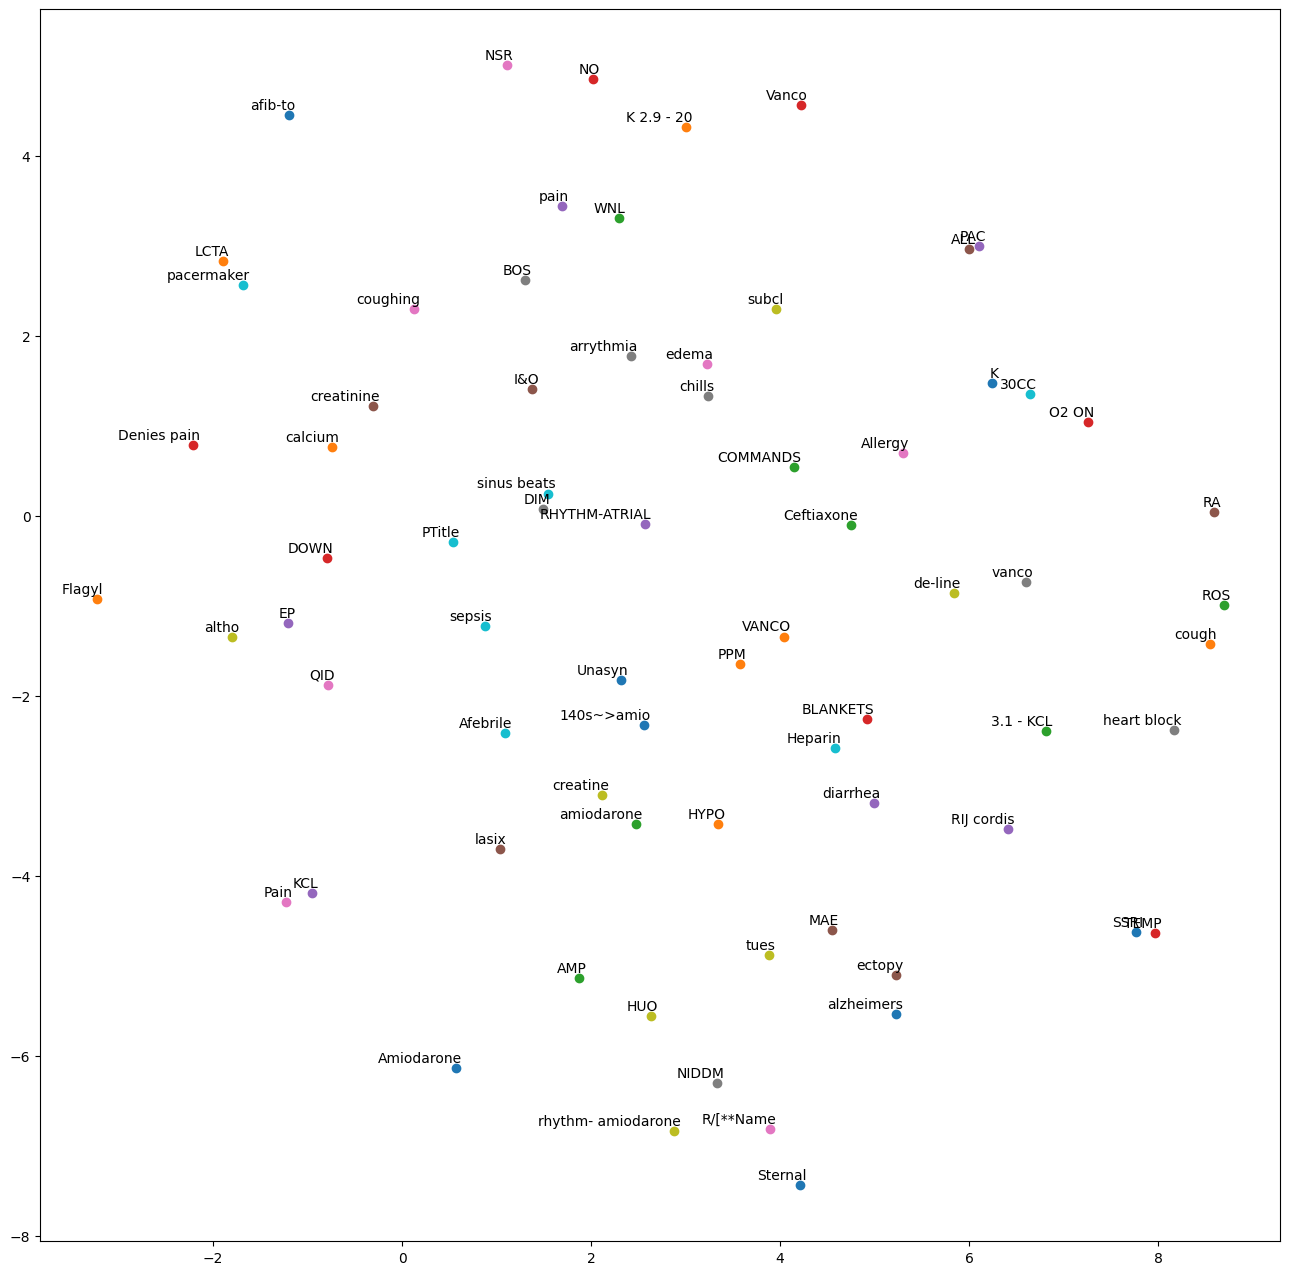

In [85]:
vocabs = model.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model,new_v)

In [107]:
from gensim.models import word2vec

model = word2vec.Word2Vec(corpus, min_count=1)

In [108]:
model.wv['Pain']

array([ 1.3205700e-03, -9.8011065e-03,  4.6015168e-03, -4.2613005e-04,
        6.3132988e-03,  1.7034012e-03, -3.1150428e-03,  7.9057291e-03,
        1.4152612e-03,  8.9892874e-06, -4.5976541e-03, -8.4769260e-03,
       -7.7998196e-03,  8.7209782e-03, -8.8988785e-03,  9.0195294e-03,
       -9.2716599e-03, -3.0801626e-04, -1.9689105e-03, -9.0602357e-03,
        8.6903013e-03,  6.8328530e-03,  3.0716136e-03,  4.7545042e-03,
        7.1455936e-05,  9.3815858e-03,  6.9405171e-03, -9.8020025e-03,
       -4.5135724e-03, -1.2339174e-03,  3.0612650e-03, -4.3980717e-03,
        1.5120191e-03, -8.0085574e-03,  2.7912701e-03,  4.7649057e-03,
        4.9485867e-03, -3.2110771e-03, -8.4456783e-03, -9.3301982e-03,
       -7.2743057e-04, -7.3678140e-03, -6.8717939e-03,  6.1315275e-03,
        7.2155944e-03,  2.1074440e-03, -7.9471758e-03, -5.7073873e-03,
        8.1185168e-03,  3.9768862e-03, -5.2304626e-03, -7.4432692e-03,
        7.4605847e-04,  3.4534342e-03,  2.1268842e-03,  3.0867944e-03,
      

In [109]:
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=20, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


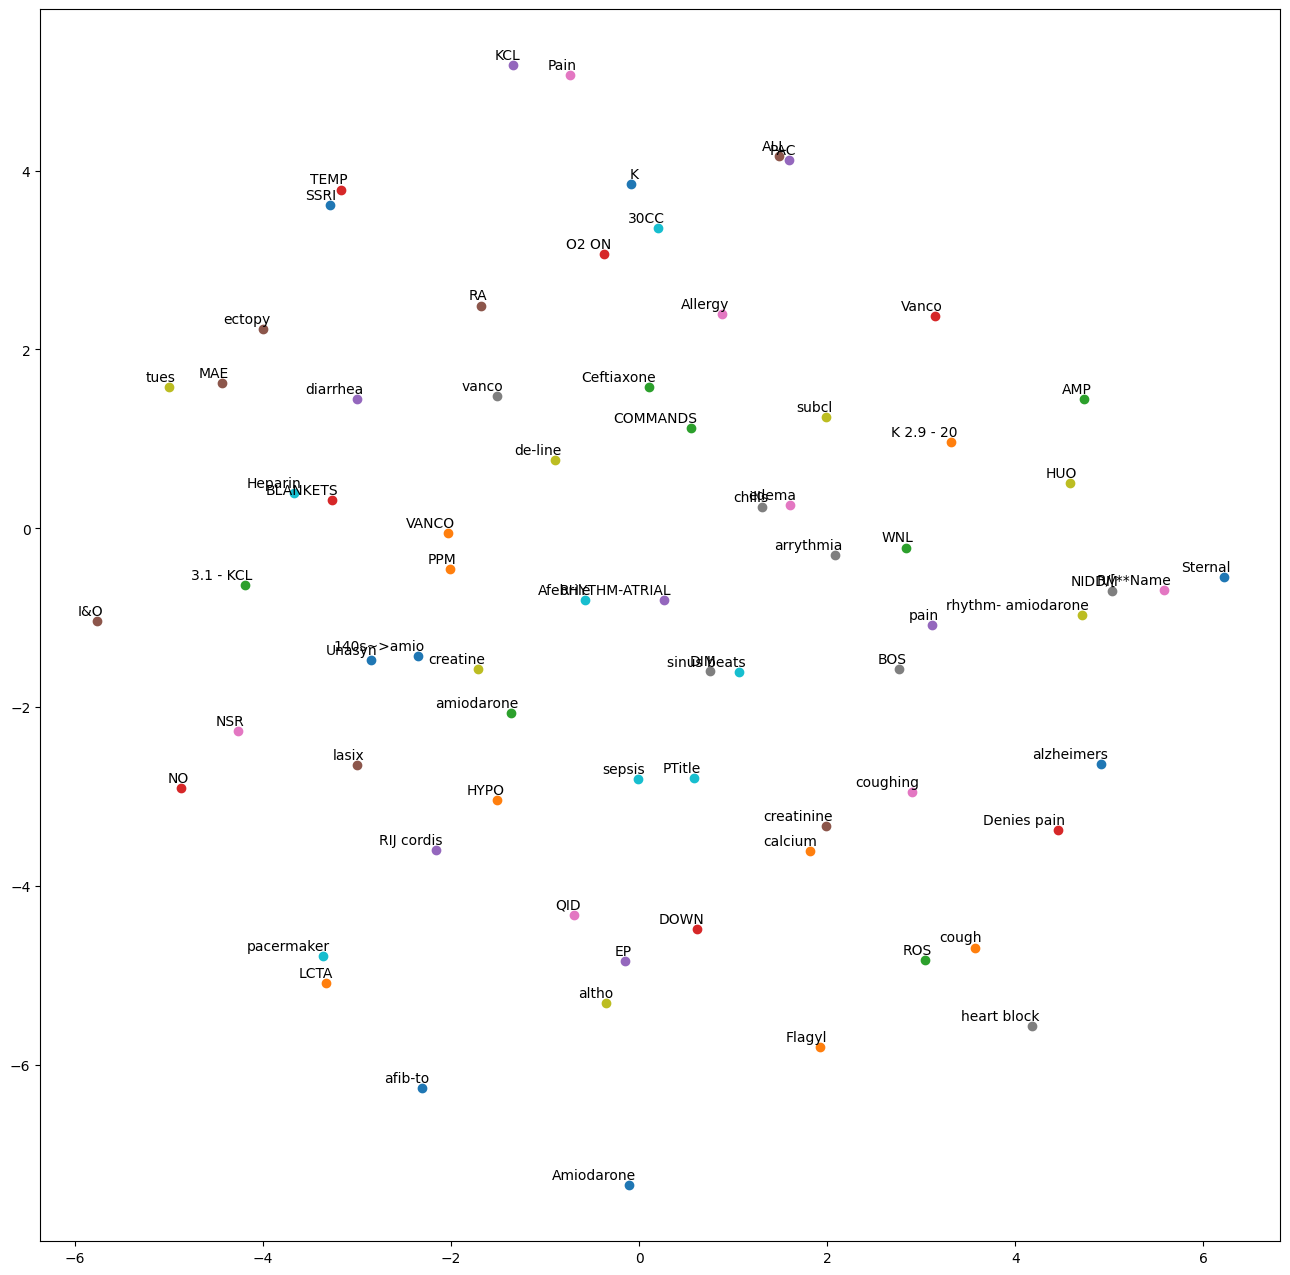

In [128]:
vocabs1 = model.wv.key_to_index.keys()
new_v1 = np.array(list(vocabs1)) # Changed nlp.array to np.array
tsne_plot(model,new_v1)

In [112]:
pretrained_model.most_similar("pain")

[('suffering', 0.8522157073020935),
 ('stress', 0.8403443098068237),
 ('pains', 0.8383826017379761),
 ('stomach', 0.8355621695518494),
 ('heart', 0.8273093700408936),
 ('discomfort', 0.8232466578483582),
 ('suffer', 0.7984423637390137),
 ('fatigue', 0.7964779138565063),
 ('bleeding', 0.7879483103752136),
 ('severe', 0.7831525206565857)]

In [113]:
corpus_in_pretrained_model = []
for word in vocabs:
  if word in pretrained_model:
    corpus_in_pretrained_model.append(word)
  else:
    print(word) #

K
NO
EP
DIM
HUO
30CC
SSRI
PPM
COMMANDS
DOWN
RA
Pain
BOS
de-line
sinus beats
140s~>amio
ROS
Denies pain
RIJ cordis
QID
NIDDM
subcl
Unasyn
Flagyl
Ceftiaxone
Vanco
ectopy
NSR
altho
Heparin
HYPO
3.1 - KCL
TEMP
PAC
MAE
R/[**Name
pacermaker
afib-to
VANCO
AMP
O2 ON
KCL
I&O
rhythm- amiodarone
Afebrile
Amiodarone
LCTA
WNL
BLANKETS
RHYTHM-ATRIAL
ALL
Allergy
heart block
PTitle
Sternal
K 2.9 - 20


In [114]:
print(corpus_in_pretrained_model)

['cough', 'amiodarone', 'lasix', 'edema', 'pain', 'calcium', 'creatinine', 'sepsis', 'diarrhea', 'chills', 'alzheimers', 'arrythmia', 'tues', 'coughing', 'vanco', 'creatine']


In [ ]:
!pip install scispacy

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz

In [116]:
import scispacy
import spacy

nlp = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.10/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


In [119]:
df1 = sample_texts

In [120]:
corpus1 = []
for row in range(0, len(df1)):
  str_tokens=[]
  tokens=nlp(df1[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus1.append(str_tokens)

print(corpus1)

[['Allergy', 'Heparin', 'altho', 'chills', 'NSR', 'ectopy', 'edema', 'cough', 'diarrhea', 'Pain', 'Vanco', 'Ceftiaxone', 'Flagyl', 'Unasyn', 'sepsis', 'subcl'], ['pain', 'amiodarone', 'edema', 'cough', 'cough', 'NIDDM', 'QID', 'BOS', 'creatinine', 'lasix', 'de-line'], ['pain', 'sinus beats', '140s~>amio', 'calcium', 'cough', 'lasix'], ['ROS', 'Denies pain', 'alzheimers', 'amiodarone', 'RIJ cordis', 'Sternal', 'PTitle', 'lasix', 'K', 'creatine', 'heart block', 'amiodarone'], ['I&O', 'ALL', 'COMMANDS', 'RHYTHM-ATRIAL', 'BLANKETS', 'WNL', 'DOWN', 'K', 'K', 'EP', 'DOWN'], ['LCTA', 'cough', 'Amiodarone', 'K', 'Afebrile', 'Pain'], ['rhythm- amiodarone', 'vanco', 'RA', 'coughing'], ['COMMANDS', 'NO', 'PPM', 'K 2.9 - 20', 'KCL', 'DIM', 'O2 ON', 'NO', 'HUO', '30CC', 'SSRI', 'AMP', 'VANCO', 'PPM'], ['amiodarone', 'afib-to', 'EP', 'pacermaker', 'tues', 'arrythmia', 'edema', 'R/[**Name'], ['MAE', 'PAC', 'TEMP', 'EP', 'NO', 'K', '3.1 - KCL', 'DIM', 'RA', 'HYPO', 'HUO', '30CC', 'SSRI', 'EP', 'NO']]
